In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [2]:
df = pd.read_csv("pm25_annual_fixed.csv")
df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,...,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18


In [3]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Metric Used', 'Method Name', 'Year',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Completeness Indicator', 'Valid Day Count',
       'Required Day Count', 'Exceptional Data Count', 'Null Data Count',
       'Primary Exceedance Count', 'Secondary Exceedance Count',
       'Certification Indicator', 'Num Obs Below MDL', 'Arithmetic Mean',
       'Arithmetic Standard Dev', '1st Max Value', '1st Max DateTime',
       '2nd Max Value', '2nd Max DateTime', '3rd Max Value',
       '3rd Max DateTime', '4th Max Value', '4th Max DateTime',
       '1st Max Non Overlapping Value', '1st NO Max DateTime',
       '2nd Max Non Overlapping Value', '2nd NO Max DateTime',
       '99th Percentile', '98th Percentile', '95th Percentile',
       '90th Percentile', '75th Percentile', '

In [4]:
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
points

0                      POINT (-87.880258 30.497478)
1                      POINT (-85.803608 33.284928)
2                      POINT (-87.638097 34.762619)
3                      POINT (-85.969858 34.288567)
4              POINT (-85.99264699999998 33.991494)
5                      POINT (-85.390789 31.224783)
6                         POINT (-86.815 33.553056)
7              POINT (-87.00361099999998 33.331111)
8              POINT (-86.54916700000004 33.545278)
9              POINT (-86.92416700000004 33.499722)
10                     POINT (-86.844112 33.521427)
11             POINT (-86.58636199999999 34.687761)
12                     POINT (-88.087761 30.770181)
13             POINT (-86.26339399999998 32.412811)
14                     POINT (-86.967536 34.530717)
15     POINT (-84.99965300000002 32.43702800000001)
16              POINT (-86.34943800000001 33.27947)
17                     POINT (-87.484189 33.189931)
18                    POINT (-112.095767 33.503833)
19          

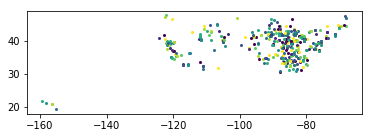

In [5]:
power_plants = gpd.GeoDataFrame(df, geometry=points)
power_plants.crs = {'init': 'epsg:4326'}
power_plants.plot()

In [6]:
states = gpd.read_file("cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [7]:
states.crs

{'init': 'epsg:4269'}

In [8]:
power_plants.crs

{'init': 'epsg:4326'}

In [9]:
states = states.to_crs(power_plants.crs)

(-197.09527795, 197.72483894999999, -18.844392050000003, 75.660855050000009)

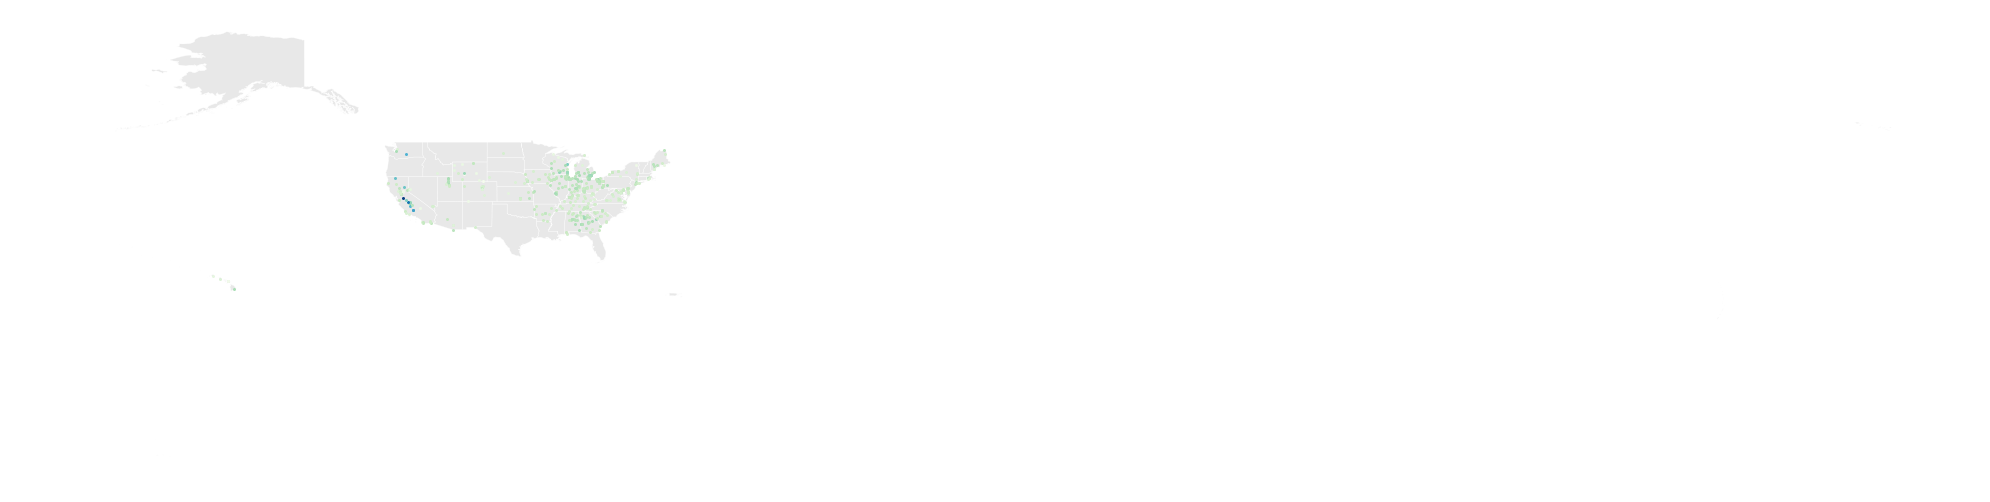

In [10]:
ax = states.plot(figsize=(35,20), color='lightgrey', linewidth=0.25, edgecolor='white')
power_plants.plot(column='Arithmetic Mean', ax=ax, markeredgewidth=0, cmap='GnBu', markersize=3)
ax.axis('off')